In [5]:
#### 데이터 준비
import numpy as np
x = np.array([1,2,1,1,1,2,2,1,1])
y = np.array([100,200,100,50,10,20,20,10,10])
len(x),len(y)

(9, 9)

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() # 추정기 함수 활성화
model.fit(np.reshape(x,(-1,1)),y) # w,b가 생성
model.coef_,model.intercept_  # w- coef_  ,   b-intercept_

(array([33.33333333]), 13.333333333333336)

In [17]:
newX=3
newX=np.reshape(newX,(-1,1))
newY=newX*model.coef_ + model.intercept_
newY

array([[113.33333333]])

In [18]:
model.predict(newX)

array([113.33333333])

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression # 사망 또는 생존 0,1 둘 중 한개 출력
import numpy as np

In [21]:
##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/binary_classification/%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_b0fdSDZ.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/binary_classification/%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_b0fdSDZ.xlsx?raw=true', sheet_name='test')

In [22]:
train_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survival
0,2,"Lehmann, Miss. Bertha",Female,17,0,0,SC 1748,12.00,C,1
1,3,"Laitinen, Miss. Kristina Sofia",Female,37,0,0,4135,9.59,S,0
2,3,"Rosblom, Mr. Viktor Richard",Male,18,1,1,370129,20.21,S,0
3,3,"Karaic, Mr. Milan",Male,30,0,0,349246,7.90,S,0
4,3,"Moen, Mr. Sigurd Hansen",Male,25,0,0,348123,7.65,S,0


In [23]:
test_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survival
0,2,"Phillips, Miss. Alice Frances Louisa",Female,21,0,1,S.O./P.P. 2,21.00,S,1
1,3,"Asim, Mr. Adola",Male,35,0,0,SOTON/O.Q. 3101310,7.05,S,0
2,1,"Spedden, Mr. Frederic Oakley",Male,45,1,1,16966,134.50,C,1
3,2,"Maybery, Mr. Frank Hubert",Male,40,0,0,239059,16.00,S,0
4,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",Female,55,2,0,11770,25.70,S,1


In [24]:
labels = ['사망', '생존'] #  0 , 1

In [25]:
# EDA 후에 아래 작업을 실행

##########데이터 전처리

x_train = train_df.drop(['name', 'ticket', 'survival'], axis=1)
x_test = test_df.drop(['name', 'ticket', 'survival'], axis=1)
y_train = train_df['survival']
y_test = test_df['survival']

In [27]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,Female,17,0,0,12.00,C
1,3,Female,37,0,0,9.59,S
2,3,Male,18,1,1,20.21,S
3,3,Male,30,0,0,7.90,S
4,3,Male,25,0,0,7.65,S


In [ ]:
# 머신러닝에 들어가는 x데이터는 문자데이터는 안됨
# 벡터 데이터야 함.
# 성별의 경우에는 Male = 0 , Female = 1
# embarked는 0,1,2,3,.....로 줬을때 이 값이 순서대로 값의 크기가 의미가 있는가를 고민
# 문자를 단순하게 숫자 0,1,2,3.... 로 작성을 하지 않음. -> 원핫인코딩 작업을 진행.
# x 데이터는 더미변수화, y변수는 원 핫 인코딩


In [28]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['pclass', 'sex', 'embarked']),
    remainder='passthrough')
transformer.fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)


In [30]:
x_train[0]

array([ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0., 17.,  0.,  0., 12.])

In [39]:
##########모델 생성

model = LogisticRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #

0.7945205479452054
0.7763578274760383


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
##########모델 예측

x_test = [
    [2, 'Female', 21, 0, 1, 21.00, 'S']  # 새로운 데이터를 넣어서 한번 테스트
]
x_test = pd.DataFrame(x_test, columns=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'])
x_test = transformer.transform(x_test)

y_predict = model.predict(x_test)
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(label, confidence) #

생존 0.867532641303584


In [12]:
# 사이킷런에서 제공하는 당뇨병데이터셋 샘플 (x값한개 넣기위한 작업임, 의미없음)
from sklearn.datasets import load_diabetes
import numpy as np
diabetes = load_diabetes()
diabetes.keys() # 구성항목 확인가능

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [13]:
diabetes.DESCR #설명

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [16]:
diabetes.target
len(diabetes)

8

In [9]:
# 한개의 x값을 갖는 인공신경망을 만들기위하여 임의로 3번째의 변수를 x값으로 할당함, 3번째변수 의미없는 값임
x = diabetes.data[:, 2]
y = diabetes.target

np.shape(x), np.shape(y)  # x,y 데이터갯수 같아야함.

((442,), (442,))

In [ ]:
#사이킷런 머신러닝이라면 모델만 결정하면 됨
## 전처리 필요없음. x값의 숫자화(벡터화), 정규화(표준화) 다 되어 있음
# 예측(회귀분석) wx+b를 계산하는 회귀분석 모델만 선택하면 됨
# 어떤 모델을 사용할 것인가, 그 모델의 설명력만

In [30]:
xx=[[1,2,3],
    [2,2,3],
    [2,2,3],
    [2,3,4]]
w=[[10,11,12,13,14],
    [20,21,22,23,24],
    [30,31,32,33,34]]
b=[100,0,0,0,0]

xx=np.array(xx); w=np.array(w)
np.shape(xx),np.shape(w),np.dot(xx,w) # 내적 곱

yhat=[]
for x in range(5):
  yhat.append(np.dot(xx,w[:,x])+b[x])

# yhat1=np.dot(xx,w[:,0])+b[0]
yhat

[array([240, 250, 250, 300]),
 array([146, 157, 157, 209]),
 array([152, 164, 164, 218]),
 array([158, 171, 171, 227]),
 array([164, 178, 178, 236])]

In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


In [6]:
type(mnist)

module

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


[5 0 4 1 9 2 1 3 1 4]


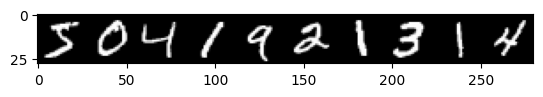

In [5]:
import matplotlib.pyplot as plt
import numpy as np
img=np.hstack(x_train[:10])
plt.imshow(img,cmap='gray')
print(y_train[:10])

In [14]:
len(y_train),len(y_test),np.unique(y_train,return_counts=True)

(60000,
 10000,
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])))

In [16]:
np.shape(x_train),np.shape(x_test)
# 28행,28열의 흑백이미지 60000장

((60000, 28, 28), (10000, 28, 28))

In [17]:
####################
## x,y 데이터 훈련,테스트 로 나누어진 데이터를 array로 받음
## 사진데이터를 로드, array로 변환, 사이즈를 통일, label 변환 X  -> 이런 작업을 안했음
## 지도학습, 사진을 넣으면 0,1,2,3,4,5,6,7,8,9 의 10개중 어떤 카테고리 인가를 맞추는
## 다항분류 문제 -> 이 다항문제는 무조건 원핫인코딩 되어 있거나
## 아니면 모델에서 원핫인코딩 시켜야 함
## 이 자료에서    원핫 인코딩 => 0은 [1,0,0,0,0,0,0,0,0,0]
#                                9는 [0,0,0,0,0,0,0,0,0,1]


In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.2), # 과적합없애기 w 값을 20% 정도 0으로 변경
  tf.keras.layers.Dense(10, activation='softmax') #softmax는 다항분류 계산식(활성화 함수)
])                    # 0부터 9 10개라서

# 원래는 categorical_crossentropy인데
# y입력값이 원핫 인코딩이 안되어 있으면 sparse_categorical_crossentropy 라고 지정하면
# 알아서 원핫 인코딩함

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.weights[:3] # 이 숫자값들이 위의 Param이다

[<tf.Variable 'dense_10/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[-0.02046815,  0.07029878, -0.07852688, ...,  0.07356028,
          0.0625338 , -0.00505873],
        [ 0.01511646,  0.08109699,  0.01529352, ...,  0.05833872,
         -0.0773064 , -0.0507885 ],
        [ 0.05749066,  0.0255833 , -0.00434426, ..., -0.03766018,
         -0.05207096, -0.04716407],
        ...,
        [ 0.01721168, -0.04590262, -0.08030356, ...,  0.00247847,
         -0.01735726,  0.06664816],
        [ 0.07849453, -0.06081414,  0.07023121, ..., -0.05496176,
         -0.02290105, -0.02672068],
        [ 0.04349515, -0.00484522, -0.0775534 , ...,  0.03914833,
         -0.05240383, -0.0572902 ]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [37]:
hist=model.fit(x_train,y_train,epochs=50,
          validation_data=(x_train,y_train),batch_size=100)

Epoch 1/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0766 - accuracy: 0.9764 - val_loss: 0.0436 - val_accuracy: 0.9870
Epoch 2/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.0375 - val_accuracy: 0.9896
Epoch 3/50
600/600 [==============================] - 3s 6ms/step - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.0338 - val_accuracy: 0.9906
Epoch 4/50
600/600 [==============================] - 5s 9ms/step - loss: 0.0614 - accuracy: 0.9804 - val_loss: 0.0298 - val_accuracy: 0.9918
Epoch 5/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0561 - accuracy: 0.9822 - val_loss: 0.0265 - val_accuracy: 0.9925
Epoch 6/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0526 - accuracy: 0.9829 - val_loss: 0.0231 - val_accuracy: 0.9940
Epoch 7/50
600/600 [==============================] - 5s 9ms/step - loss: 0.0501 - accuracy: 0.9843 - val_loss: 0.0207 - val_accuracy: 0.9945
Epoch 

In [39]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
model.save_weights('mnist.h5')

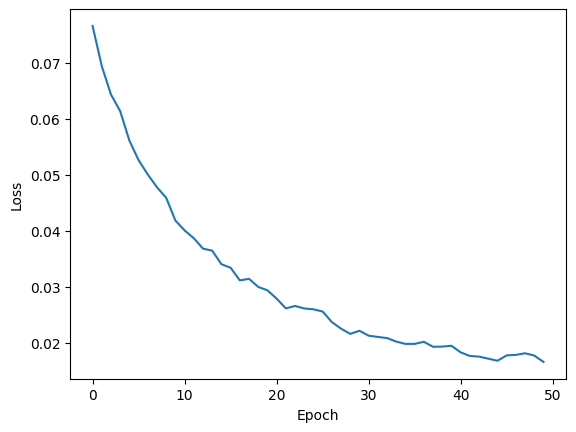

In [43]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [44]:
## 새 파일이라 생각하고 작업
## 손글씨 0~9 까지의 카테고리를 분류하는 비전 모델
## 학습시에 28*28 의 검정색 배경, 흑백을 학습함
## 원핫 인코딩하지 않고 y값을 학습해서 모델에서 원핫 인코딩함

In [12]:
# 모델 불러오기
import tensorflow as tf
from keras.models import *

model=tf.keras.models.load_model('/content/완료_mnist.h5')
model

In [73]:
from PIL import Image
img=Image.open('num3.jpg').resize((28,28)).convert('L') # grayscale로 변환
img

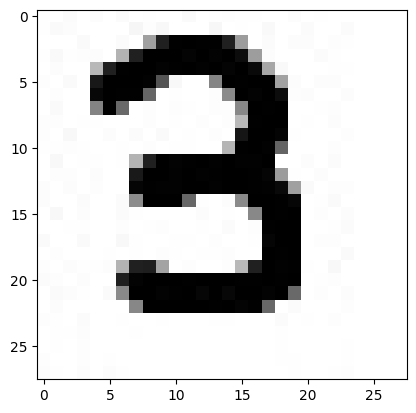

In [74]:
plt.imshow(img,cmap='gray')

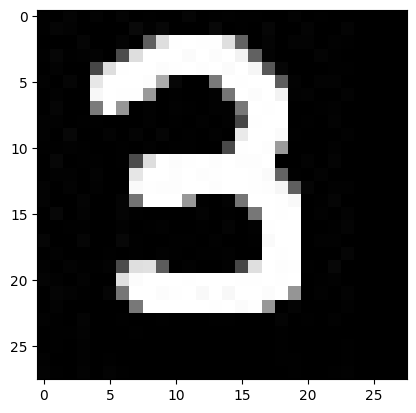

In [77]:
img=np.array(img)
img=255-img
img=img/255.0
plt.imshow(img,cmap='gray')

In [78]:
print(np.shape(img)) # x_train의 shape은 60000,28,28

(28, 28)


In [81]:
newimg=np.reshape(img,(1,28,28)) # 학습할떄의 shape이 60000,28,28 ->3차원 이기때문에


In [85]:
result=model.predict(newimg)
result

1/1 [==============================] - 0s 33ms/step


array([[5.4138128e-20, 7.8358682e-21, 8.2140023e-10, 9.6086818e-01,
        0.0000000e+00, 3.9131753e-02, 1.0029385e-19, 5.7900130e-12,
        2.9260684e-17, 2.5765729e-29]], dtype=float32)

In [86]:
result.argmax()

3

In [89]:
# y값을 원핫 인코딩 하지않고 모델 작업에서 loss에서
#loss ='sparse_categorical_crossentropy' 하면 tf.nn.softma 해야 함
predictions=model(newimg)
tf.nn.softmax(predictions)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08580839, 0.08580839, 0.08580839, 0.22430012, 0.08580839,
        0.08923279, 0.08580839, 0.08580839, 0.08580839, 0.08580839]],
      dtype=float32)>

In [91]:
np.sum(tf.nn.softmax(predictions))

1.0

In [94]:
np.argmax(tf.nn.softmax(predictions))# 가장 큰 위치값 구하기, 숫자값이 최종결과라 여기서 끝

3

(30, 28, 28)
예측값


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1])

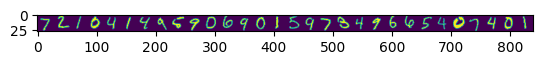

In [14]:
import numpy as np
import matplotlib.pyplot as plt
testData=x_test[:30]
print(np.shape(testData))

predictions=model(testData)
result=tf.nn.softmax(predictions)

plt.imshow(np.hstack(x_test[:30]))

print('예측값')

np.argmax(result,axis=1)

In [ ]:
## 만약 숫자 레이블이 따로 있다면

class_num=['숫자0','숫자1','숫자2','숫자3','숫자4','숫자5','숫자6','숫자7','숫자8','숫자9']
